# Intro

Gradient descent is one of the main algorithms of model optimization and also the common way to optimize neural networks (DL). 

*
$$ J(θ)=∑Ji(θ) $$

$$ θ:=θ−η∇_{θ}J(θ)=θ−η∑∇J_{i}(θ)$$

*
>The basic idea is :  Gradient descent can minimize cost function J(θ)
parameterized by a model’s parameters θ by updating the parameters in the opposite direction of the gradient of the cost function ∇J(θ) to the parameters.


The learning rate η determines the size of the steps we take to reach a (local) minimum. In other words, we follow the direction of the slope of the surface created by the cost function J(θ) downhill until we reach a valley.




In [3]:
#cd analysis/ML_/doc/



Demo how Gradient descent works : 

1. Get gradient of curve (cost function), 
2. Then move the current value to next smaller value
   (the moving step is determined by "learning rate η  "),
3. Until reaching local minimum of the given function.
4. Finish model parameter tuning 
   (find the combination of parameters make cost function J(θ) minimum)






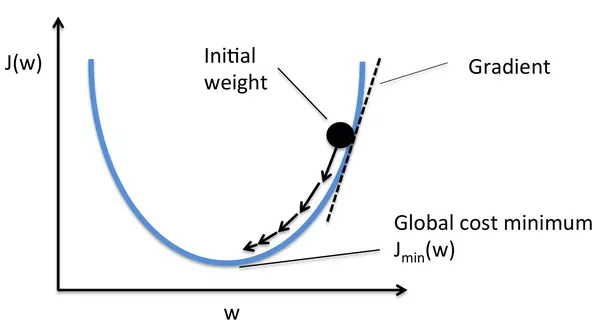

In [4]:
# credit : 
from IPython.display import Image
print ("""

Demo how Gradient descent works : 

1. Get gradient of curve (cost function), 
2. Then move the current value to next smaller value
   (the moving step is determined by "learning rate η  "),
3. Until reaching local minimum of the given function.
4. Finish model parameter tuning 
   (find the combination of parameters make cost function J(θ) minimum)



""")
Image(filename='gradient_descent.png')

# Approaches :

In this notebook, we demo 3  main algorithms of Gradient descent

*
> Batch Gradient Descent
- using ***ALL*** data evaluate gradient vector
- converge to global minimum for convex error surfaces & to local minimum for non-convex surfaces. 


*
> Stochastic Gradient Descent
- update θ sequentially with every loop (with random shuffle sample data ). 
- cheaper/faster computation, would get larger variance of the loss function compared with batch-gradient-decent

  

*
> Mini-batch Gradient Descent
- dev 


# Ref :

https://am207.github.io/2017/wiki/gradientdescent.html


In [5]:
# analysis library
import pandas as pd, numpy as np 
from scipy import stats 
import matplotlib.pyplot as plt
%matplotlib inline
%pylab inline
from mpl_toolkits.mplot3d import Axes3D

# ML
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets.samples_generator import make_regression

Populating the interactive namespace from numpy and matplotlib


## 0) Data prepare 

In [6]:
# help functions 


def make_sample_data():
    # sklearn sample data generator
    # http://scikit-learn.org/stable/modules/classes.html#module-sklearn.datasets
    x, y = make_regression(n_samples = 300, 
                           n_features=1, 
                           n_informative=1, 
                           noise=30,
                           random_state=110)
    # flatten() : Return a copy of the array collapsed into one dimension.
    # https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.ndarray.flatten.html
    x = x.flatten()
    slope, intercept, _,_,_ = stats.linregress(x,y)
    best_fit = np.vectorize(lambda x: x * slope + intercept)
    return x,y,grid,best_fit,intercept,slope

def error(X, Y, THETA):
    return np.sum((X.dot(THETA) - Y)**2)/(2*Y.size)


def plot_gradian_decent_3D_(ms,bs,history,cost):
    # np.meshgrid
    # Return coordinate matrices from coordinate vectors.
    # https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.meshgrid.html
    M, B = np.meshgrid(ms, bs)

    zs = np.array([error(xaug, y, theta) 
                   # np.ravel
                   # Return a contiguous flattened array.
                   # https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.ravel.html
                   for theta in zip(np.ravel(M), np.ravel(B))])
    Z = zs.reshape(M.shape)

    fig = plt.figure(figsize=(10, 6))
    ax = fig.add_subplot(111, projection='3d')

    ax.plot_surface(M, B, Z, rstride=1, cstride=1, color='b', alpha=0.2)
    ax.contour(M, B, Z, 20, color='b', alpha=0.5, offset=0, stride=30)


    ax.set_xlabel('Intercept')
    ax.set_ylabel('Slope')
    ax.set_zlabel('Cost')
    ax.view_init(elev=30., azim=30)
    #ax.plot([theta[0]], [theta[1]], [cost[-1]] , markerfacecolor='r', markeredgecolor='r', marker='o', markersize=7);
    #ax.plot([history[0][0]], [history[0][1]], [cost[0]] , markerfacecolor='r', markeredgecolor='r', marker='o', markersize=7);


    #ax.plot([t[0] for t in history], [t[1] for t in history], cost , markerfacecolor='r', markeredgecolor='r', marker='.', markersize=2);
    ax.plot([t[0] for t in history], [t[1] for t in history], 0 , markerfacecolor='r', markeredgecolor='r', marker='.', markersize=2);



In [7]:
# get sample data 
x,y,grid,best_fit,intercept,slope = make_sample_data()

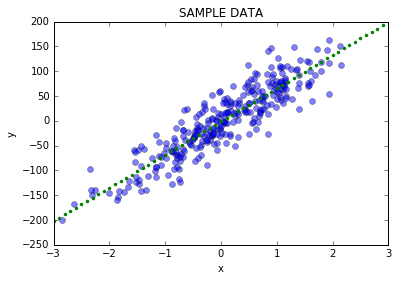

In [8]:
# visualize sample data 
plt.plot(x,y, 'o', alpha=0.5)
grid = np.arange(-3,3,0.1)
plt.xlabel('x')
plt.ylabel('y')
plt.title('SAMPLE DATA')
plt.plot(grid,best_fit(grid), '.')

## 1) Batch gradient descent

In [9]:
"""
pseudo code of Batch gradient descent :

for i in range(loop):
    params_grad = get_gradient(loss_function, data, params)
    params = params - learning_rate * params_grad

"""


def batch_gradient_descent(x, y, theta_init, step=0.001, maxsteps=0, precision=0.001, ):
    costs = []   # value of lost function 
    history = [] # to store all thetas
    preds = []   # prediction
    m = len(y)   # number of data points
    theta = theta_init # start from initial state 
    counter = 0  # after how many loops to get preds data 
    oldcost = 0  # last cost (relative to currentcost)
    pred = np.dot(x, theta) # predict y with hypothesis : y=a*b 
    error = pred - y        # get error (real value VS predict value)
    currentcost = np.sum(error ** 2) / (2 * m)
    #currentcost = np.sum(error ** 2) / (2 )
    preds.append(pred)
    costs.append(currentcost)
    history.append(theta)
    counter+=1
    while abs(currentcost - oldcost) > precision:
        oldcost=currentcost
        # get gradient :  
        gradient = x.T.dot(error)/m 
        ###### update thetha : θ:=θ−η∇*J(θ)
        theta = theta - step * gradient  
        ######
        history.append(theta)
        
        pred = np.dot(x, theta)
        error = pred - y 
        currentcost = np.sum(error ** 2) / (2 * m)
        #currentcost = np.sum(error ** 2) / (2 )
        costs.append(currentcost) 
        
        if counter % 25 == 0: 
            preds.append(pred)
        counter+=1
        if maxsteps:
            if counter == maxsteps:
                break
        
    return history, costs, preds, counter

In [10]:
xaug = np.c_[np.ones(x.shape[0]), x]
theta_i = [-15, 40] + np.random.rand(2)
history, cost, preds, iters = batch_gradient_descent(xaug, y, theta_i, step=0.1)
theta = history[-1]
print("Gradient Descent: {:.2f}, {:.2f} {:d}".format(theta[0], theta[1], iters))
print("Least Squares: {:.2f}, {:.2f}".format(intercept, slope))

Gradient Descent: -1.29, 66.81 59
Least Squares: -1.29, 66.90


In [11]:
#plt.plot(history)
#history

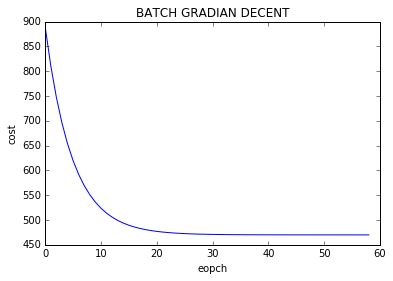

In [12]:
plt.xlabel('eopch')
plt.ylabel('cost')
plt.title('BATCH GRADIAN DECENT')
plt.plot(range(len(cost)), cost);

In [25]:
#history

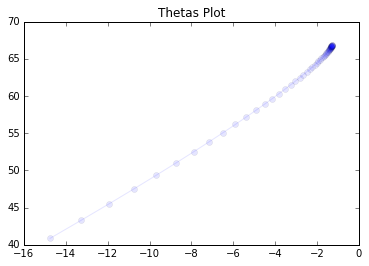

In [29]:
plt.title('Thetas Plot')
plt.plot([t[0] for t in history], [t[1] for t in history],'o-', alpha=0.1)

In [13]:
# fitting process  in 2D 
# dev 

//anaconda/envs/g_dash/lib/python3.4/site-packages/numpy/ma/core.py:6385: MaskedArrayFutureWarning: In the future the default for ma.minimum.reduce will be axis=0, not the current None, to match np.minimum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)
//anaconda/envs/g_dash/lib/python3.4/site-packages/numpy/ma/core.py:6385: MaskedArrayFutureWarning: In the future the default for ma.maximum.reduce will be axis=0, not the current None, to match np.maximum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)


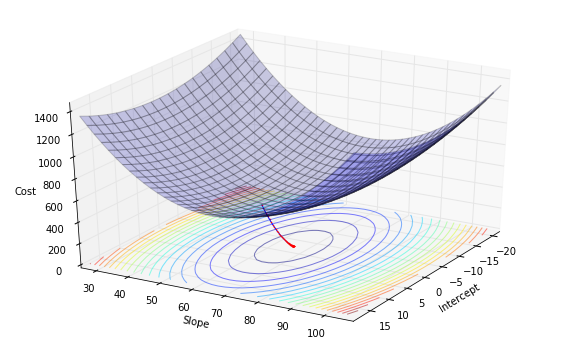

In [14]:
#  fitting process  in 3D 

ms = np.linspace(theta[0] - 20 , theta[0] + 20, 20)
bs = np.linspace(theta[1] - 40 , theta[1] + 40, 40)

plot_gradian_decent_3D_(ms,bs,history,cost)

## 2) Stochastic gradient descent

In [34]:
"""
pseudo code of Stochastic gradient descent :

for i in range(loop):
  ### SHUFFLE DATA BEFORE SAMPLING & get gradiendt (avoid bias ) ###
  np.random.shuffle(data)
  for sample in data:
    params_grad = get_gradient(loss_function, sample, params)
    params = params - learning_rate * params_grad

"""


def sgd(x, y, theta_init, step=0.001, maxsteps=0, precision=0.001, ):
    costs = []
    history = [] # to store all thetas
    preds = []
    grads=[]
    m = len(y) # number of data points
    oldtheta = 0
    theta = theta_init
    counter = 0
    oldcost = 0
    epoch = 0
    i = 0 #index
    pred = np.dot(x[i,:], theta)
    error = pred - y[i]
    gradient = x[i,:].T*error
    grads.append(gradient)
    print(gradient,x[i],y[i],pred, error, np.sum(error ** 2) / 2)
    currentcost = np.sum(error ** 2) / 2
    counter+=1
    preds.append(pred)
    costsum = currentcost
    costs.append(costsum/counter)
    history.append(theta)
    print("start",counter, costs, oldcost)
    while 1:
        #while abs(costs[counter-1] - oldcost) > precision:
        #while np.linalg.norm(theta - oldtheta) > precision:
        #oldcost=currentcost
        gradient = x[i,:].T*error
        grads.append(gradient)
        oldtheta = theta
        theta = theta - step * gradient  # update
        history.append(theta)
        i += 1
        if i == m:#reached one past the end.
            #break
            epoch +=1
            ### SHUFFLE : SHUFFLE DATA BEFORE SAMPLING & get gradiendt (avoid bias )
            neworder = np.random.permutation(m)
            x = x[neworder]
            y = y[neworder]
            ###
            i = 0
        ### prediction with sampled-shuffled data ###
        pred = np.dot(x[i,:], theta)
        error = pred - y[i]
        currentcost = np.sum(error ** 2) / 2
        
        if counter % 25 == 0: preds.append(pred)
        counter+=1
        costsum += currentcost
        oldcost = costs[counter-2]
        costs.append(costsum/counter)
        if maxsteps:
            #print("in maxsteps")
            if counter == maxsteps:
                break
        
    return history, costs, preds, grads, counter, epoch

In [18]:
history2, cost2, preds2, grads2, iters2, epoch2 = sgd(xaug, y, theta_i, maxsteps=5000, step=0.01)

[ 33.63152359 -75.69906476] [ 1.         -2.25083662] -140.376232643 -106.744709057 33.6315235861 565.539689363
start 1 [565.53968936276658] 0


In [19]:
#print(iters2, history2[-1], epoch2, grads2[-1])

(0, 1000)

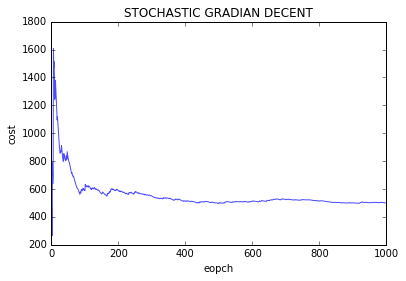

In [20]:
plt.xlabel('eopch')
plt.ylabel('cost')
plt.title('STOCHASTIC GRADIAN DECENT')
plt.plot(range(len(cost2[-10000:])), cost2[-10000:], alpha=0.7);
# for making large variance of the loss function clear in early eopch
plt.xlim(0,1000)

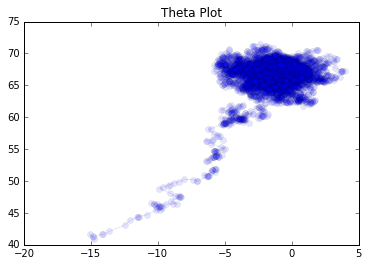

In [32]:
plt.title('Theta Plot')
plt.plot([t[0] for t in history2], [t[1] for t in history2],'o-', alpha=0.1)

//anaconda/envs/g_dash/lib/python3.4/site-packages/numpy/ma/core.py:6385: MaskedArrayFutureWarning: In the future the default for ma.minimum.reduce will be axis=0, not the current None, to match np.minimum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)
//anaconda/envs/g_dash/lib/python3.4/site-packages/numpy/ma/core.py:6385: MaskedArrayFutureWarning: In the future the default for ma.maximum.reduce will be axis=0, not the current None, to match np.maximum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)


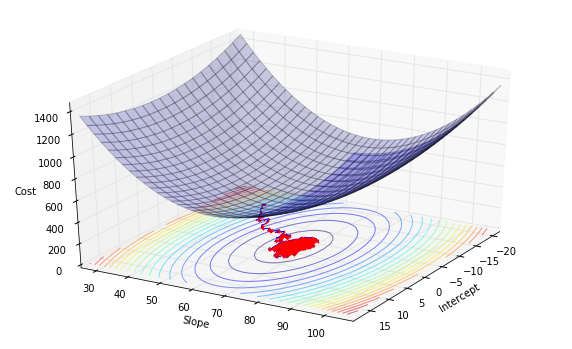

In [21]:
#  fitting process  in 3D 

ms = np.linspace(theta[0] - 20 , theta[0] + 20, 20)
bs = np.linspace(theta[1] - 40 , theta[1] + 40, 40)

plot_gradian_decent_3D_(ms,bs,history2,cost2)

## 3) Mini-batch gradient descent

In [33]:
# dev